In [33]:
#importing the dependencies 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import joblib
from mpl_toolkits.mplot3d import Axes3D



In [10]:
#importing the mall-customers dataset into a pandas dataframe
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [35]:
customer_data.shape

(200, 5)

In [36]:
#to understand our dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
customer_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


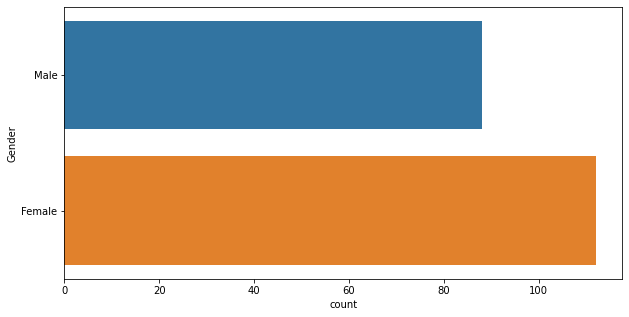

In [15]:
# Checking male and females head count 
plt.figure(figsize=(10,5))
sns.countplot(y='Gender', data=customer_data)
plt.show()


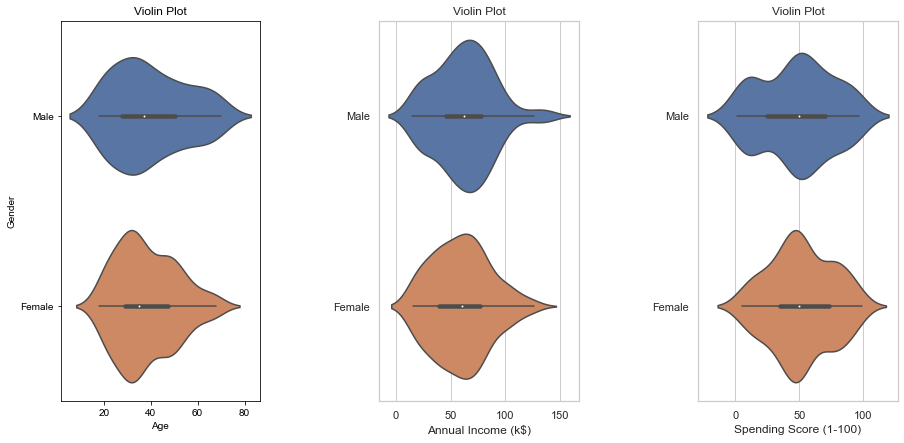

In [16]:
# Checking age,annual income and spending score based on gender
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.6, wspace=0.6)
    sns.violinplot(x=cols, y='Gender', data=customer_data)
    plt.ylabel('Gender' if n==1 else '' )
    plt.title("Violin Plot")
plt.show()   

In [17]:
#checking for null values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

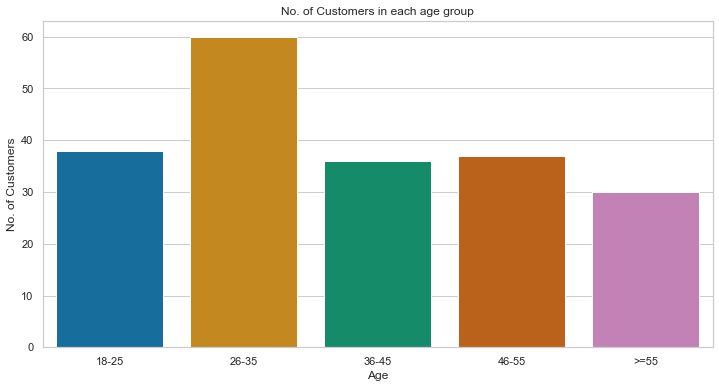

In [18]:
#checking the data based on age
age_18_25 = customer_data.Age[(customer_data.Age >=18) & (customer_data.Age <=25)]
age_26_35 = customer_data.Age[(customer_data.Age >=26) & (customer_data.Age <=35)]
age_36_45 = customer_data.Age[(customer_data.Age >=36) & (customer_data.Age <=45)]
age_46_55 = customer_data.Age[(customer_data.Age >=46) & (customer_data.Age <=55)]
age_55_above = customer_data.Age[(customer_data.Age >= 55)]

agex = ['18-25', '26-35', '36-45', '46-55', '>=55']
agey = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55_above)]

plt.figure(1,figsize = (12,6))
sns.barplot(x=agex, y=agey, palette='colorblind')
plt.xlabel('Age')
plt.ylabel('No. of Customers')
plt.title("No. of Customers in each age group")
plt.show()

In [19]:
# choosing the annual income column and spending score columns
# column extraction and slicing 
X1 = customer_data.iloc[:,[3,4]].values


In [20]:
#Choosing No. of clusters
#WCSS - Within Clusters Sum of Squares
wcss = []

for i in range(1,11):
    #using the Kmeans function from sklearn.cluster and fitting the data into it 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    


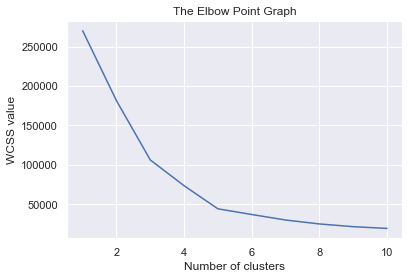

In [21]:
# Elbow Method to find optimum value of k 
sns.set()

# Setting the Graph
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

In [22]:
#Training the KMeans clustering model with 5 clusters 
kmeans_1 = KMeans(n_clusters=5, init='k-means++', random_state=30)

#return a label for each data point based on their cluster
Y1 = kmeans_1.fit_predict(X1)


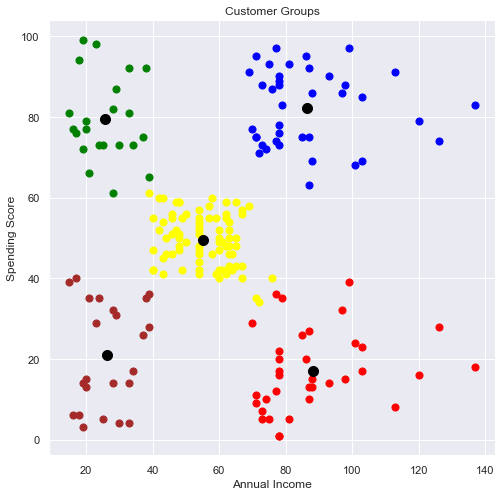

In [23]:
# plotting the clusters  and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X1[Y1==0,0], X1[Y1==0,1], s=50, c='green', label="Cluster 1")
plt.scatter(X1[Y1==1,0], X1[Y1==1,1], s=50, c='yellow', label="Cluster 2")
plt.scatter(X1[Y1==2,0], X1[Y1==2,1], s=50, c='red', label="Cluster 3")
plt.scatter(X1[Y1==3,0], X1[Y1==3,1], s=50, c='blue', label="Cluster 4")
plt.scatter(X1[Y1==4,0], X1[Y1==4,1], s=50, c='brown', label="Cluster 5")

# plotting the centroids for all the clusters 
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], 
            s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

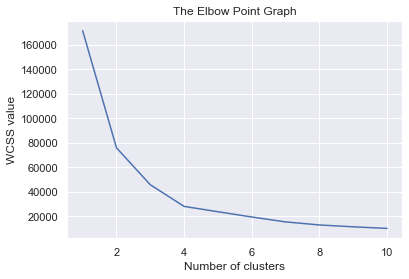

In [24]:
X2 = customer_data.iloc[:,[2,4]].values
wcss = []

for i in range(1,11):
    #using the Kmeans function from sklearn.cluster and fitting the data into it 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

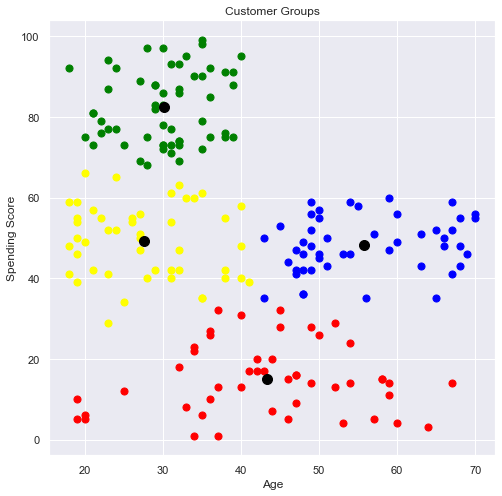

In [25]:
#Training the KMeans clustering model with 4 clusters 
kmeans_2 = KMeans(n_clusters=4, init='k-means++', random_state=30)

#return a label for each data point based on their cluster
Y2 = kmeans_2.fit_predict(X2)

plt.figure(figsize=(8,8))
plt.scatter(X2[Y2==0,0], X2[Y2==0,1], s=50, c='green', label="Cluster 1")
plt.scatter(X2[Y2==1,0], X2[Y2==1,1], s=50, c='yellow', label="Cluster 2")
plt.scatter(X2[Y2==2,0], X2[Y2==2,1], s=50, c='red', label="Cluster 3")
plt.scatter(X2[Y2==3,0], X2[Y2==3,1], s=50, c='blue', label="Cluster 4")


# plotting the centroids for all the clusters 
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], 
            s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

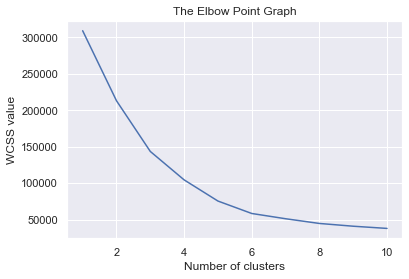

In [26]:
# Clustering on the basis of age , spending score and annual income 
X3 = customer_data.iloc[:,[2, 3, 4]].values
wcss = []

for i in range(1,11):
    #using the Kmeans function from sklearn.cluster and fitting the data into it 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

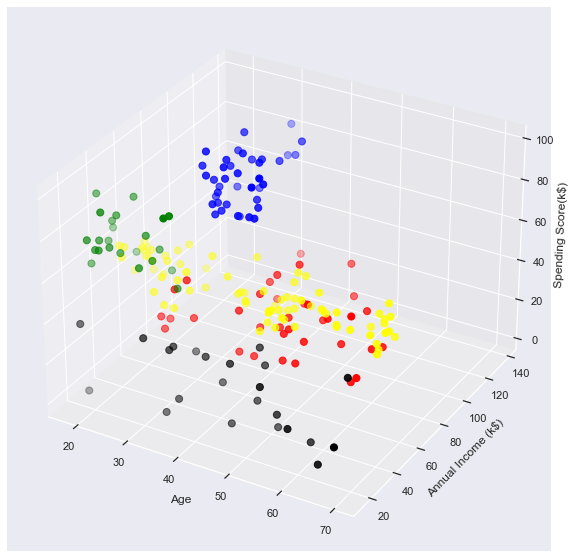

In [27]:
#Training the KMeans clustering model with 5 clusters 
kmeans_3 = KMeans(n_clusters=5, init='k-means++', random_state=30)

#return a label for each data point based on their cluster
Y3 = kmeans_3.fit_predict(X3)

graph = plt.figure(figsize=(20,10))
#defining a axis for the 3D plot
axis = graph.add_subplot(111, projection ='3d')
axis.scatter(X3[Y3==0,0], X3[Y3==0,1], X3[Y3==0,2], s=50, c='green', label="Cluster 1")
axis.scatter(X3[Y3==1,0], X3[Y3==1,1], X3[Y3==1,2], s=50, c='yellow', label="Cluster 2")
axis.scatter(X3[Y3==2,0], X3[Y3==2,1], X3[Y3==2,2], s=50, c='red', label="Cluster 3")
axis.scatter(X3[Y3==3,0], X3[Y3==3,1], X3[Y3==3,2], s=50, c='blue', label="Cluster 4")
axis.scatter(X3[Y3==4,0], X3[Y3==4,1], X3[Y3==4,2], s=50, c='black', label="Cluster 5")

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
axis.set_zlabel("Spending Score(k$)")
plt.show()

In [37]:
#saving the model
joblib.dump(kmeans_3,"Customer_Segmentation")
model =  joblib.load("Customer_Segmentation")

#A sneak peek into prediction
input = [20,60,100]
model.predict([input])


array([3])